# Tensor와 Numpy 기본 사용법

In [ ]:
import tensorflow as tf
import cProfile

tf.executing_eagerly()

True

In [ ]:
x = [[2.]]
m = tf.matmul(x, x)
print("Hello : {}".format(m))

Hello : [[4.]]


In [ ]:
a = tf.constant(
    [[1,2],
    [3,4]]
)
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
# 브로드캐스팅

b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
# 연산자 오버로딩
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [ ]:
# NumPy값 사용
import numpy as np
c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


# 동적인 제어 흐름

In [ ]:
def fizzbuzz(max_num):
    couter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num.numpy() + 1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print("FizzBuzz")
        elif int(num % 3) == 0:
            print("Fizz")
        elif int(num % 5) == 0:
            print("Buzz")
        else:
            print(num.numpy())
        couter += 1

In [ ]:
fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


# 그래디언트 계산하기(자동미분)

In [ ]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as my_tape:
    loss = w * w
    print("loss : ",loss)
grad = my_tape.gradient(loss, w)
print(grad)

loss :  tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


# 모델 훈련

In [ ]:
# 데이터 가져오기 및 포맷 맞추기
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 모델 생성
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

In [ ]:
# 참고 : 즉시 실행에선, 훈련을 하지 않아도 모델을 사용할 수 있음.
for images, labels in dataset.take(1):
    print("logit : ", mnist_model(images[0:1]).numpy())

logit :  [[-0.02009825 -0.06714948  0.05148575 -0.06185687 -0.03031054  0.03807355
  -0.01928085 -0.03808624  0.04347233 -0.0009839 ]]


In [ ]:
# 옵티마이저, 손실함수 생성
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [ ]:
def train_step(images, labels):
    # 순전파
    with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True) # 앞서 설정한, 배치사이즈 등의 설정에 맞게 자름.
        loss_value = loss_object(labels, logits) # 손실 계산
    loss_history.append(loss_value.numpy().mean()) # 손실 저장
    
    # 역전파
    grads = tape.gradient(loss_value, mnist_model.trainable_variables) # 미분 계산
    optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables)) # 적용

def train():    
    for epoch in range(3):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(images, labels)
        print("epoch : {}".format(epoch))

In [ ]:
train()

epoch : 0
epoch : 1
epoch : 2


Text(0, 0.5, 'Loss [entropy]')

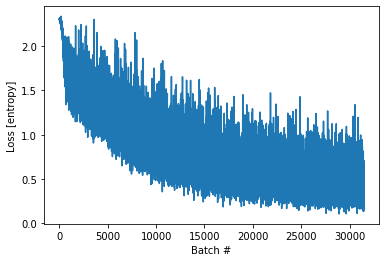

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [entropy]")